In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

## Exploratory Part 1 - Flight Cancellations vs Covid Cases

Here we check how weekly flight cancellations and weekly number of covid cases in the first 6 months of 2020 look like and if there is any correlation between them.

In [ ]:
# Let us load flights data for the two states
%cd /content/drive/Shareddrives/CSE544_Project/Exploratory/flight_dataset
df_md_flights_2020 = pd.read_csv("MD_2020_flights.csv", usecols=['FL_DATE', 'CANCELLED'])
df_la_flights_2020 = pd.read_csv("LA_2020_flights.csv", usecols=['FL_DATE', 'CANCELLED'])
# Let us load cases data for the two states
%cd /content/drive/Shareddrives/CSE544_Project/covid_dataset
df_covid_la = pd.read_csv('covid_la_cleaned.csv', usecols = ['submission_date','new_case'])
df_covid_md = pd.read_csv('covid_md_cleaned.csv', usecols = ['submission_date','new_case'])

/content/drive/Shareddrives/CSE544_Project/Exploratory/flight_dataset
/content/drive/Shareddrives/CSE544_Project/covid_dataset


#### Let us now process the covid dataset

In [ ]:
#  code to convert time/date sttring to datetime format for easier processing
df_la_flights_2020['FL_DATE'] = pd.to_datetime(df_la_flights_2020['FL_DATE'])
df_md_flights_2020['FL_DATE'] = pd.to_datetime(df_md_flights_2020['FL_DATE'])
df_covid_la['submission_date'] = pd.to_datetime(df_covid_la['submission_date'])
df_covid_md['submission_date'] = pd.to_datetime(df_covid_md['submission_date'])

In [ ]:
df_covid_la['day'] = df_covid_la.submission_date.dt.day
df_covid_la['week'] = df_covid_la.submission_date.dt.week
df_covid_la['month'] = df_covid_la.submission_date.dt.month
df_covid_la['year'] = df_covid_la.submission_date.dt.year

df_covid_md['day'] = df_covid_md.submission_date.dt.day
df_covid_md['week'] = df_covid_md.submission_date.dt.week
df_covid_md['month'] = df_covid_md.submission_date.dt.month
df_covid_md['year'] = df_covid_md.submission_date.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [ ]:
# Let us see how the data looks like for Maryland's daily covid cases for the year 2020
df_covid_md = df_covid_md[df_covid_md['year'] == 2020]
# Let us see how the data looks like for Louisiana's daily covid cases for the year 2020
df_covid_la = df_covid_la[df_covid_la['year'] == 2020]

In [ ]:
# We drop the rest of the date time columns to keep only week for our inference.
df_covid_la = df_covid_la[['week','new_case']]
df_covid_md = df_covid_md[['week','new_case']]

#### Let us now process the flights dataset

In [ ]:
df_la_flights_2020['day'] = df_la_flights_2020.FL_DATE.dt.day
df_la_flights_2020['week'] = df_la_flights_2020.FL_DATE.dt.week
df_la_flights_2020['month'] = df_la_flights_2020.FL_DATE.dt.month
df_la_flights_2020['year'] = df_la_flights_2020.FL_DATE.dt.year
df_la_flights_2020 = df_la_flights_2020[['week','CANCELLED']]
df_md_flights_2020['day'] = df_md_flights_2020.FL_DATE.dt.day
df_md_flights_2020['week'] = df_md_flights_2020.FL_DATE.dt.week
df_md_flights_2020['month'] = df_md_flights_2020.FL_DATE.dt.month
df_md_flights_2020['year'] = df_md_flights_2020.FL_DATE.dt.year
df_md_flights_2020 = df_md_flights_2020[['week','CANCELLED']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [ ]:
# Let's sum all the cancelled as well as total scheduled flights by week
df_la_covid_weekly_cases = df_covid_la.groupby(['week']).sum().reset_index()
df_md_covid_weekly_cases = df_covid_md.groupby(['week']).sum().reset_index()

In [ ]:
df_la_flights_weekly_cancels = df_la_flights_2020.groupby(['week']).sum().reset_index()
df_md_flights_weekly_cancels = df_md_flights_2020.groupby(['week']).sum().reset_index()
df_la_flights_weekly_cancels['total'] = df_la_flights_2020.groupby(['week']).count().reset_index()['CANCELLED']
df_md_flights_weekly_cancels['total'] = df_md_flights_2020.groupby(['week']).count().reset_index()['CANCELLED']

#### We merge the weekly counts for cancelled flights, total flights and covid cases for that week for both of the states

In [ ]:
df_covid_flights_md = pd.merge(df_md_flights_weekly_cancels,
                              df_md_covid_weekly_cases[['week', 'new_case']],
                              on='week', 
                              how='left')
df_covid_flights_md['new_case'] = df_covid_flights_md['new_case'].fillna(0)

In [ ]:
df_covid_flights_md['cancel/flight'] =  (df_covid_flights_md['CANCELLED'] / df_covid_flights_md['total']) * 100
df_covid_flights_md['cancel/flight'] = df_covid_flights_md['cancel/flight'].apply(lambda x:round(x,2))
df_covid_flights_md

,week,CANCELLED,total,new_case,cancel/flight
0,1,3,1391,0.0,0.22
1,2,28,1815,0.0,1.54
2,3,20,1791,0.0,1.12
3,4,5,1801,0.0,0.28
4,5,0,1793,0.0,0.00
5,6,20,1805,0.0,1.11
6,7,13,1790,0.0,0.73
7,8,7,1832,0.0,0.38
8,9,15,1835,0.0,0.82
9,10,2,1866,5.0,0.11


In [ ]:
df_covid_flights_la = pd.merge(df_la_flights_weekly_cancels,
                              df_la_covid_weekly_cases[['week', 'new_case']],
                              on='week', 
                              how='left')
df_covid_flights_la['new_case'] = df_covid_flights_la['new_case'].fillna(0)

In [ ]:
df_covid_flights_la['cancel/flight'] =  (df_covid_flights_la['CANCELLED'] / df_covid_flights_la['total']) * 100
df_covid_flights_la['cancel/flight'] = df_covid_flights_la['cancel/flight'].apply(lambda x:round(x,2))
df_covid_flights_la

,week,CANCELLED,total,new_case,cancel/flight
0,1,7,1139,0.0,0.61
1,2,33,1573,0.0,2.10
2,3,39,1541,0.0,2.53
3,4,4,1556,0.0,0.26
4,5,10,1539,0.0,0.65
5,6,19,1561,0.0,1.22
6,7,20,1639,0.0,1.22
7,8,19,1758,0.0,1.08
8,9,2,1764,0.0,0.11
9,10,5,1737,0.0,0.29


#### Pearson Correlation: 

In order to understand the coorelation between weekly covid cases and flight cancellations or scheduled flights we perform pearson correlation measure of linear correlation between two sets of data.

In [ ]:
def pearson_correlation(X, Y):
  X_diff = X - X.mean()
  Y_diff = Y - Y.mean()
  XY_diff_sum = (X_diff*Y_diff).sum()
  X_diff_2 = (X_diff ** 2).sum()
  Y_diff_2 = (Y_diff ** 2).sum() 
  return XY_diff_sum / np.sqrt((X_diff_2*Y_diff_2))

##### Observation :

In [ ]:
print('Pearson Correlation for Louisiana [Ratio of Cancelled Flights]:',pearson_correlation(df_covid_flights_la['cancel/flight'], df_covid_flights_la['new_case']))
print('Pearson Correlation for Maryland [Ratio of Cancelled Flights]:',pearson_correlation(df_covid_flights_md['cancel/flight'], df_covid_flights_md['new_case']))

Pearson Correlation for Louisiana [Ratio of Cancelled Flights]: 0.4654271185288054
Pearson Correlation for Maryland [Ratio of Cancelled Flights]: 0.3547660432351594


 1. We see a change in number of flights cancelled per week per flights scheduled per week as we see an increase in the cases after week 10. We perform a person correlation here and find it to be **positively correlated**.



In [ ]:
print('Pearson Correlation for Louisiana [Total Scheduled Flights]:',pearson_correlation(df_covid_flights_la['total'], df_covid_flights_la['new_case']))
print('Pearson Correlation for Maryland [Total Scheduled Flights]:',pearson_correlation(df_covid_flights_md['total'], df_covid_flights_md['new_case']))

Pearson Correlation for Louisiana [Total Scheduled Flights]: -0.5573626240781092
Pearson Correlation for Maryland [Total Scheduled Flights]: -0.8111527340901258


2. Secondly, we see a decrease in number of flights per week as we see an increase in the cases after week 10. We perform a person correlation here and find it to be **negatively correlated**.

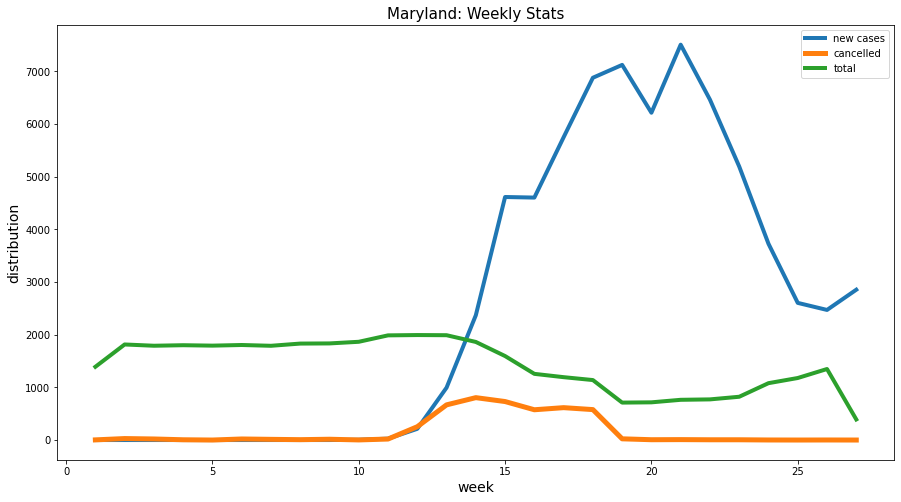

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.xlabel('week', fontsize=14)
plt.ylabel('distribution', fontsize=14)

plt.plot(df_covid_flights_md['week'], df_covid_flights_md['new_case'], label="new cases", linewidth = 4)
plt.plot(df_covid_flights_md['week'], df_covid_flights_md['CANCELLED'], label="cancelled", linewidth = 5)
plt.plot(df_covid_flights_md['week'], df_covid_flights_md['total'], label="total", linewidth = 4)
plt.title("Maryland: Weekly Stats", fontsize = 15)
plt.legend(fontsize = 10)

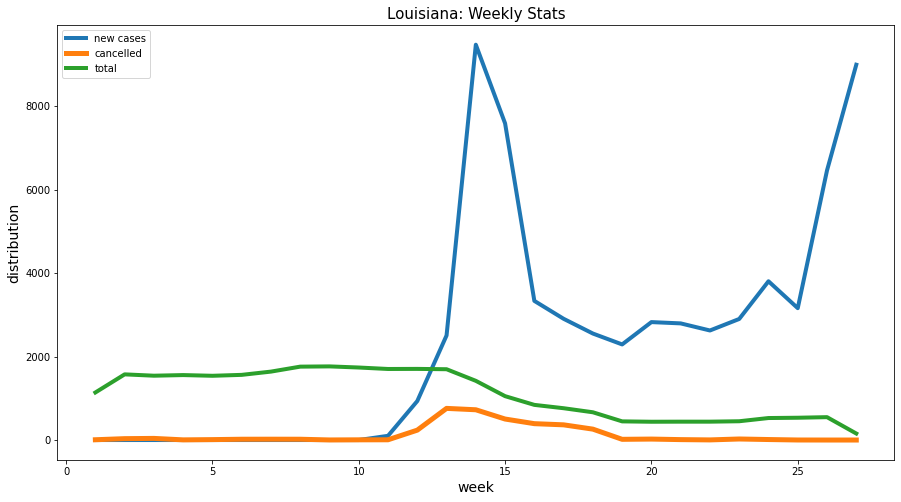

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.xlabel('week', fontsize=14)
plt.ylabel('distribution', fontsize=14)

plt.plot(df_covid_flights_la['week'], df_covid_flights_la['new_case'], label="new cases", linewidth = 4)
plt.plot(df_covid_flights_la['week'], df_covid_flights_la['CANCELLED'], label="cancelled", linewidth = 5)
plt.plot(df_covid_flights_la['week'], df_covid_flights_la['total'], label="total", linewidth = 4)
plt.title("Louisiana: Weekly Stats", fontsize = 15)
plt.legend(fontsize = 10)

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic &> /dev/null
!jupyter nbconvert --to pdf /content/drive/Shareddrives/CSE544_Project/Exploratory/Inference-1.ipynb  &> /dev/null